## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols_with_missing] = diabetes_data[cols_with_missing].replace(0, np.nan)

In [6]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

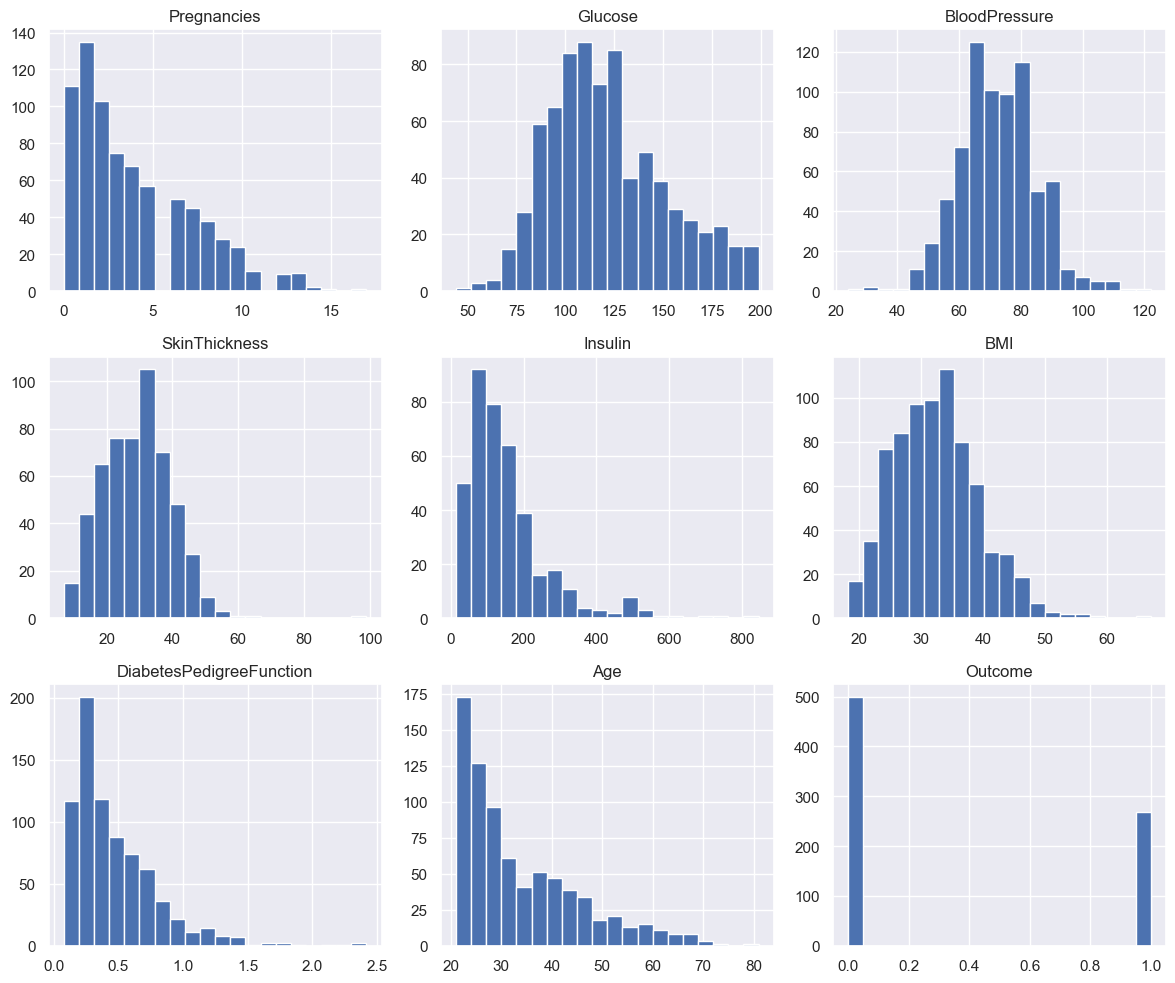

In [7]:
diabetes_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [8]:
# diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
# diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
# diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
# diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
# diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

diabetes_data['BMI'] and others create a Series object, Pandas doesn’t know for sure if that Series is a direct view of the dataframe (the real pantry) or a copy (a temporary bowl).

If it’s a copy, filling it in-place (inplace=True) won’t actually affect the original dataframe. That’s why pandas shows the “chained assignment warning” → it’s telling you: “I don’t know if you’re modifying the pantry or just a bowl you scooped out!”

In [9]:
# Define fill values (mean/median for each column)
fill_values = {
    'Glucose': diabetes_data['Glucose'].mean(),
    'BloodPressure': diabetes_data['BloodPressure'].mean(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median()
}

# Fill missing values in one step
diabetes_data.fillna(value=fill_values, inplace=True)

In [10]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here, it is operating directly on the dataframe itself (diabetes_data). No intermediate Series, no ambiguity. Pandas knows for sure.

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

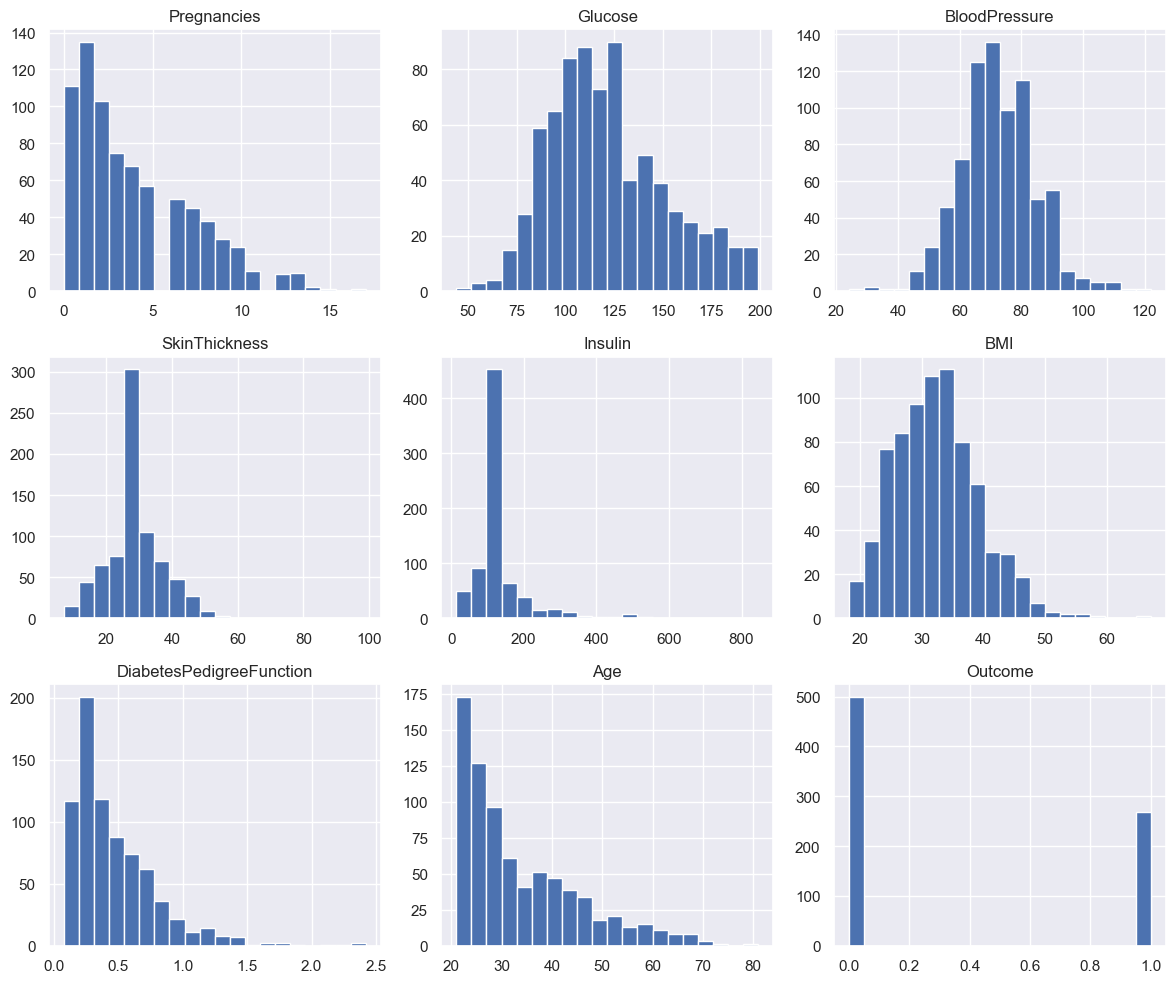

In [11]:
diabetes_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


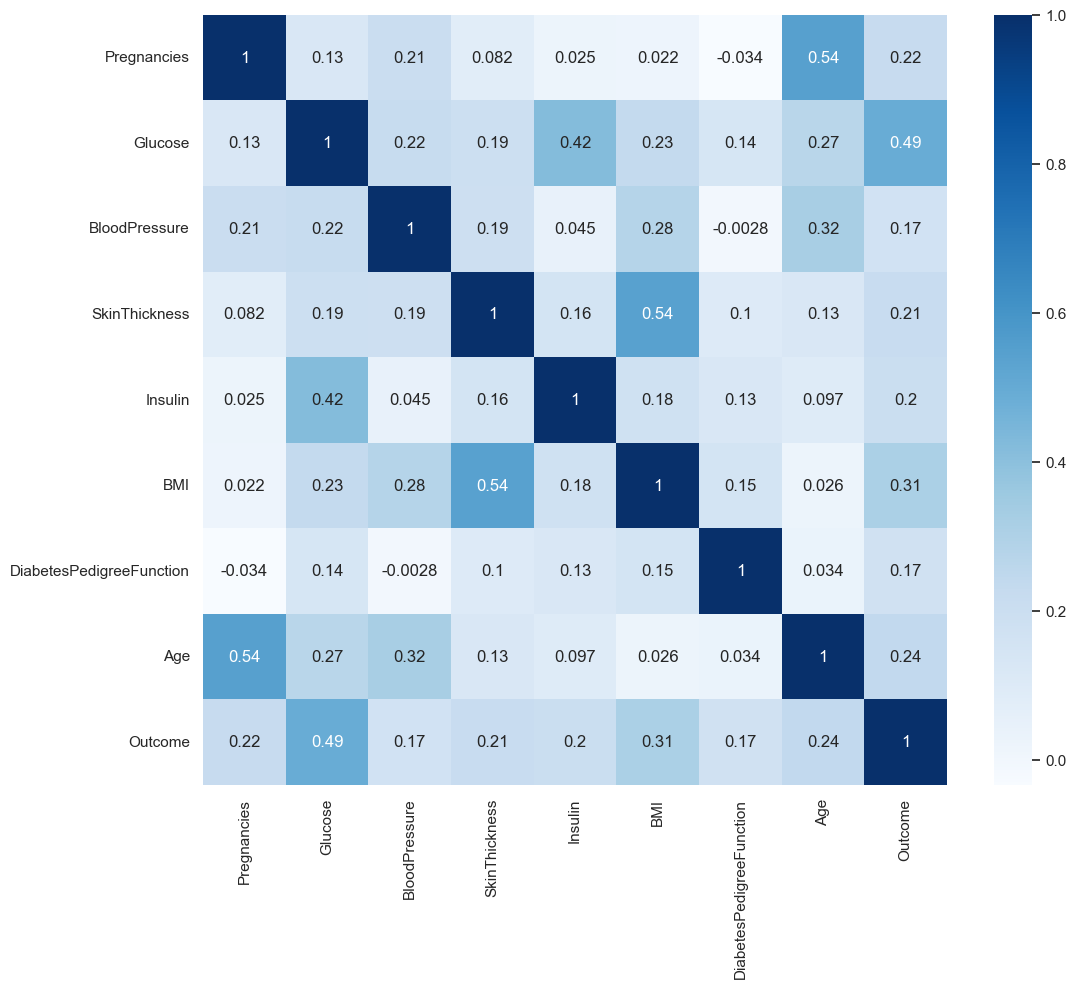

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train) # .fit_transform means calculating the mean and std (fit) and then applying scaling (transform).
X_test_scaled = scaler.transform(X_test) # .transform means using the same mean/std learned from training to transform test data.

🔹 Models that need scaling

These rely on distances or magnitudes of features, so scaling is crucial:

KNN → distance-based (Euclidean, Manhattan, etc.)

SVM → depends on distances to the separating hyperplane

Logistic Regression / Linear Regression → scale helps with numerical stability & gradient descent

Neural Networks → scaling helps training converge faster

K-Means (unsupervised) → also distance-based

 Without scaling, features with large ranges dominate.

🔹 Models that don’t really need scaling

These are tree-based models that split features using thresholds:

Decision Trees

Random Forests

Gradient Boosted Trees (XGBoost, LightGBM, CatBoost)

Scaling doesn’t matter, because trees only ask questions like: “Is Glucose > 120?”. They don’t use distances or linear weights, so feature magnitude is irrelevant.

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled, y_train)   # ✅ use scaled train
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

🔹 For most supervised models, .fit() = train and learn rules:

Training = take labeled data and produce a model (a set of rules, equations, or parameters).

Prediction = apply those rules to new data.

🔹 KNN (special among supervised models - instance-based or lazy learner), .fit() = just store the data (memorize it):

Training: just stores the data (no rules).

Prediction: finds neighbors every time and votes.

No rules → just memory lookup.

🔹 Most other supervised models are eager learners, the training process outputs rules (parameters or trees) that summarize the data:

They learn rules during training and only apply them at prediction:

Logistic Regression → learns a formula (weights for each feature).

Decision Tree / Random Forest → learns a set of if/else rules.

SVM → learns the optimal separating boundary (hyperplane).

Neural Networks → learn weights in layers of neurons.

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [17]:
for k in range(1, 10):
    print(f"k={k}: Train Score = {train_scores[k-1]:.3f}, Test Score = {test_scores[k-1]:.3f}")

k=1: Train Score = 1.000, Test Score = 0.719
k=2: Train Score = 0.844, Test Score = 0.723
k=3: Train Score = 0.862, Test Score = 0.740
k=4: Train Score = 0.829, Test Score = 0.740
k=5: Train Score = 0.834, Test Score = 0.745
k=6: Train Score = 0.810, Test Score = 0.740
k=7: Train Score = 0.806, Test Score = 0.736
k=8: Train Score = 0.806, Test Score = 0.749
k=9: Train Score = 0.801, Test Score = 0.745


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [18]:
best_k_train = train_scores.index(max(train_scores)) + 1
print(f"Best k for training = {best_k_train}, Train Score = {max(train_scores):.3f}")

Best k for training = 1, Train Score = 1.000


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [19]:
best_k_test = test_scores.index(max(test_scores)) + 1
print(f"Best k for testing = {best_k_test}, Test Score = {max(test_scores):.3f}")


Best k for testing = 8, Test Score = 0.749


Plot the train and test model performance by number of neighbors.

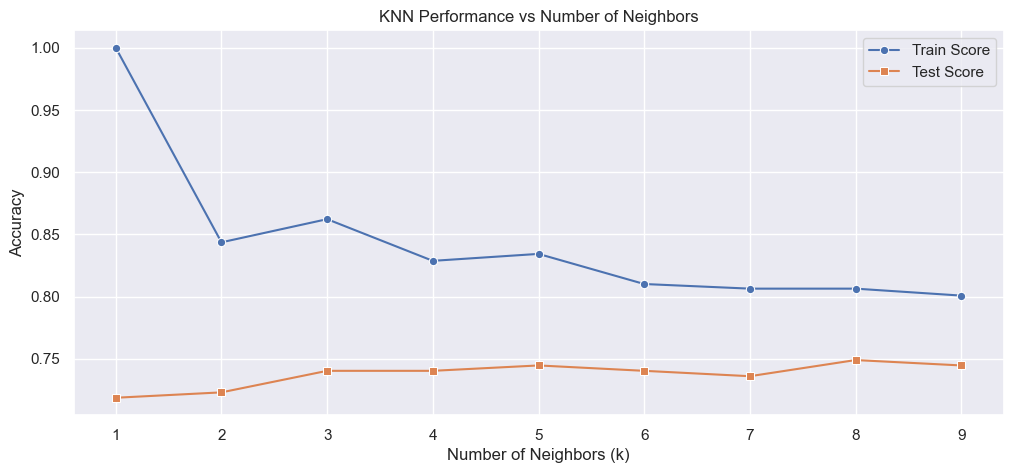

In [20]:
plt.figure(figsize=(12,5))
# p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
# p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')
# sns.lineplot() expects keyword arguments, not positional ones

# Plot training accuracy
sns.lineplot(x=range(1, len(train_scores)+1), y=train_scores, marker='o', label='Train Score')

# Plot testing accuracy
sns.lineplot(x=range(1, len(test_scores)+1), y=test_scores, marker='s', label='Test Score')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Performance vs Number of Neighbors")
plt.legend()
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
# Pick best k from the plot (looks like 8 here)
best_k = 8
print(f"Best k chosen from the plot = {best_k}")

# Fit the model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Evaluate
train_acc = knn_best.score(X_train_scaled, y_train)
test_acc = knn_best.score(X_test_scaled, y_test)

print(f"Train Accuracy with k={best_k}: {train_acc:.3f}")
print(f"Test Accuracy with k={best_k}: {test_acc:.3f}")

Best k chosen from the plot = 8
Train Accuracy with k=8: 0.806
Test Accuracy with k=8: 0.749


Why pick k=8?

It gives the highest test accuracy compared to other k values.

The train-test gap is reasonable (not huge), meaning the model generalizes better.

Larger k (like 9) doesn’t improve accuracy further.

🔹 Correct procedure to pick K:

Split the data into train and test.

Use cross-validation on the training set to select the best hyperparameter (k).

e.g., GridSearchCV with cv=5.

Lock in the chosen k, train on the whole training set.

Evaluate once on the test set to report performance.

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = knn_best.predict(X_test_scaled)   # use scaled test features
p1 = confusion_matrix(y_test, y_pred)
print(p1)


[[133  17]
 [ 41  40]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

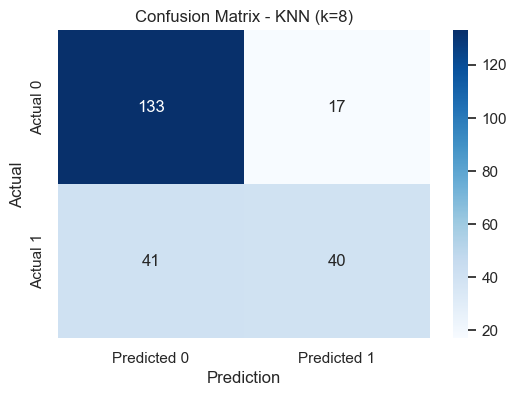

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(p1, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (k=8)")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [24]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.76      0.89      0.82       150
     Class 1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [26]:
# .best_score_ is the average accuracy on validation folds (from training data splits), for the best hyperparameter.
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7561266874350987
Best Parameters: {'n_neighbors': np.int64(9)}


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {"n_estimators": [50, 100, 200, 300, 500]}

# Set up GridSearchCV with 5-fold cross-validation
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid, cv=5, n_jobs=-1)

# Fit on training data (scaled features not needed for Random Forest)
rf_grid.fit(X_train, y_train)

# Best parameters
print("Best n_estimators from CV:", rf_grid.best_params_)

# Best model
rf_best = rf_grid.best_estimator_

# Evaluate
print("Train accuracy:", rf_best.score(X_train, y_train))
print("Test accuracy:", rf_best.score(X_test, y_test))

Best n_estimators from CV: {'n_estimators': 50}
Train accuracy: 1.0
Test accuracy: 0.7489177489177489
